In [1]:
#Importar librerias necesarias
#%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s 

In [60]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Rio_de_Janeiro = pd.read_csv("Listings Final-Rio de Janeiro.csv", on_bad_lines='skip')
Rio_de_Janeiro

In [61]:
#Identificar valores nulos por columna
# Ajustar maximo de filas
pd.options.display.max_rows = None
Valores_Nulos=Rio_de_Janeiro.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

,0
description,1163
neighborhood_overview,17648
host_location,6795
host_about,18113
host_response_time,5785
host_response_rate,5785
host_acceptance_rate,3575
host_is_superhost,868
host_neighbourhood,5885
neighbourhood,17648


In [62]:
#Información tipos de columnas
Tipos_Columnas = Rio_de_Janeiro[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

,0
description,object
neighborhood_overview,object
host_location,object
host_about,object
host_response_time,object
host_response_rate,object
host_acceptance_rate,object
host_is_superhost,object
host_neighbourhood,object
neighbourhood,object


In [63]:
#Información tipos de columnas
Tipos_Columnas = Rio_de_Janeiro[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

,0
neighbourhood_group_cleansed,float64
bathrooms,float64
bedrooms,float64
beds,float64
calendar_updated,float64
review_scores_rating,float64
review_scores_accuracy,float64
review_scores_cleanliness,float64
review_scores_checkin,float64
review_scores_communication,float64


In [64]:
#Realizamos una copia del dataframe
copia_Rio_de_Janeiro = Rio_de_Janeiro.copy()

In [67]:
#Sustituir valores nulos por un string en  concreto
copia_Rio_de_Janeiro["description"] = copia_Rio_de_Janeiro["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Rio_de_Janeiro["neighborhood_overview"] = copia_Rio_de_Janeiro["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_name"] = copia_Rio_de_Janeiro["host_name"].fillna("ANONIMO")
copia_Rio_de_Janeiro["host_location"] = copia_Rio_de_Janeiro["host_location"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_about"] = copia_Rio_de_Janeiro["host_about"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_response_time"] = copia_Rio_de_Janeiro["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_response_rate"] = copia_Rio_de_Janeiro["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_acceptance_rate"] = copia_Rio_de_Janeiro["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_is_superhost"] = copia_Rio_de_Janeiro["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Rio_de_Janeiro["host_neighbourhood"] = copia_Rio_de_Janeiro["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_total_listings_count"] = copia_Rio_de_Janeiro["host_total_listings_count"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["host_verifications"] = copia_Rio_de_Janeiro["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Rio_de_Janeiro["host_identity_verified"] = copia_Rio_de_Janeiro["host_identity_verified"].fillna("VALIDACIÓN PENDIENTE")
copia_Rio_de_Janeiro["neighbourhood"] = copia_Rio_de_Janeiro["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["neighbourhood_group_cleansed"] = copia_Rio_de_Janeiro["neighbourhood_group_cleansed"].fillna("SIN INFORMACIÓN")
copia_Rio_de_Janeiro["room_type"] = copia_Rio_de_Janeiro["room_type"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["accommodates"] = copia_Rio_de_Janeiro["accommodates"].fillna("INFORMACIÓN FALTANTE")

copia_Rio_de_Janeiro["bathrooms_text"] = copia_Rio_de_Janeiro["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["bedrooms"] = copia_Rio_de_Janeiro["bedrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["amenities"] = copia_Rio_de_Janeiro["amenities"].fillna("INFORMACIÓN FALTANTE")
copia_Rio_de_Janeiro["price"] = copia_Rio_de_Janeiro["price"].fillna("NO DEFINIDO")
copia_Rio_de_Janeiro["maximum_nights"] = copia_Rio_de_Janeiro["maximum_nights"].fillna("NO DEFINIDO")
copia_Rio_de_Janeiro["minimum_minimum_nights"] = copia_Rio_de_Janeiro["minimum_minimum_nights"].fillna("NO DEFINIDO")
copia_Rio_de_Janeiro["calendar_updated"] = copia_Rio_de_Janeiro["calendar_updated"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["has_availability"] = copia_Rio_de_Janeiro["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_30"] = copia_Rio_de_Janeiro["availability_30"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_60"] = copia_Rio_de_Janeiro["availability_60"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_90"] = copia_Rio_de_Janeiro["availability_90"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["availability_365"] = copia_Rio_de_Janeiro["availability_365"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["calendar_last_scraped"] = copia_Rio_de_Janeiro["calendar_last_scraped"].fillna("INFORMACIÓN NO DISPONIBLE")

copia_Rio_de_Janeiro["number_of_reviews_ltm"] = copia_Rio_de_Janeiro["number_of_reviews_ltm"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["first_review"] = copia_Rio_de_Janeiro["first_review"].fillna("SIN RESEÑA")
copia_Rio_de_Janeiro["last_review"] = copia_Rio_de_Janeiro["last_review"].fillna("SIN RESEÑA")


copia_Rio_de_Janeiro["review_scores_location"] = copia_Rio_de_Janeiro["review_scores_location"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Rio_de_Janeiro["instant_bookable"] = copia_Rio_de_Janeiro["instant_bookable"].fillna("INFORMACIÓN NO DISPONIBLE")

In [68]:
#Sustituir valores nulos con promedio o media
copia_Rio_de_Janeiro["minimum_nights"] = copia_Rio_de_Janeiro["minimum_nights"].fillna(round(copia_Rio_de_Janeiro["minimum_nights"].mean(), 1))
copia_Rio_de_Janeiro["maximum_maximum_nights"] = copia_Rio_de_Janeiro["maximum_maximum_nights"].fillna(round(copia_Rio_de_Janeiro["maximum_maximum_nights"].mean(), 1))
copia_Rio_de_Janeiro["maximum_nights_avg_ntm"] = copia_Rio_de_Janeiro["maximum_nights_avg_ntm"].fillna(round(copia_Rio_de_Janeiro["maximum_nights_avg_ntm"].mean(), 1))
copia_Rio_de_Janeiro["number_of_reviews_l30d"] = copia_Rio_de_Janeiro["number_of_reviews_l30d"].fillna(round(copia_Rio_de_Janeiro["number_of_reviews_l30d"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_accuracy"] = copia_Rio_de_Janeiro["review_scores_accuracy"].fillna(round(copia_Rio_de_Janeiro["review_scores_accuracy"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_checkin"] = copia_Rio_de_Janeiro["review_scores_checkin"].fillna(round(copia_Rio_de_Janeiro["review_scores_checkin"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_communication"] = copia_Rio_de_Janeiro["review_scores_communication"].fillna(round(copia_Rio_de_Janeiro["review_scores_communication"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_value"] = copia_Rio_de_Janeiro["review_scores_value"].fillna(round(copia_Rio_de_Janeiro["review_scores_value"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count"] = copia_Rio_de_Janeiro["calculated_host_listings_count"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count_entire_homes"] = copia_Rio_de_Janeiro["calculated_host_listings_count_entire_homes"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count_entire_homes"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count_private_rooms"] = copia_Rio_de_Janeiro["calculated_host_listings_count_private_rooms"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count_private_rooms"].mean(), 1))
copia_Rio_de_Janeiro["calculated_host_listings_count_shared_rooms"] = copia_Rio_de_Janeiro["calculated_host_listings_count_shared_rooms"].fillna(round(copia_Rio_de_Janeiro["calculated_host_listings_count_shared_rooms"].mean(), 1))
copia_Rio_de_Janeiro["reviews_per_month"] = copia_Rio_de_Janeiro["reviews_per_month"].fillna(round(copia_Rio_de_Janeiro["reviews_per_month"].mean(), 1))

copia_Rio_de_Janeiro["bathrooms"] = copia_Rio_de_Janeiro["bathrooms"].fillna(round(copia_Rio_de_Janeiro["bathrooms"].mean(), 1))
copia_Rio_de_Janeiro["number_of_reviews"] = copia_Rio_de_Janeiro["number_of_reviews"].fillna(round(copia_Rio_de_Janeiro["number_of_reviews"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_rating"] = copia_Rio_de_Janeiro["review_scores_rating"].fillna(round(copia_Rio_de_Janeiro["review_scores_rating"].mean(), 1))
copia_Rio_de_Janeiro["review_scores_cleanliness"] = copia_Rio_de_Janeiro["review_scores_cleanliness"].fillna(round(copia_Rio_de_Janeiro["review_scores_cleanliness"].mean(), 1))


In [69]:
#Sustituir valores nulos por un valor numérico en  concreto

copia_Rio_de_Janeiro["beds"]=copia_Rio_de_Janeiro["beds"].fillna(0)
copia_Rio_de_Janeiro["license"]=copia_Rio_de_Janeiro["license"].fillna(0)

In [70]:
#Corroboramos valores nulos
# Ajustar maximo de filas
valores_nulos=copia_Rio_de_Janeiro.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,0
neighborhood_overview,0
picture_url,0
host_id,0


In [71]:
#Seleccionar variables relevantes
Rio_de_Janeiro_variables = copia_Rio_de_Janeiro[['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [72]:
Rio_de_Janeiro_variables.head()

,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/17878,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,100%,...,2.0,2.0,"[""Smoking allowed"", ""Essentials"", ""Air conditi...",$310.00,t,319,4.71,f,1,1.88
1,https://www.airbnb.com/rooms/25026,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, Brazil",within an hour,100%,...,1.0,2.0,"[""Fast wifi \u2013 501 Mbps"", ""Essentials"", ""H...",$203.00,t,291,4.73,f,1,1.70
2,https://www.airbnb.com/rooms/220377,2024-06-27,city scrape,Suíte Casal (banheiro privativo),https://www.airbnb.com/users/show/1142424,Taciana,2011-09-11,SIN INFORMACIÓN,within an hour,100%,...,1.0,1.0,"[""Essentials"", ""Air conditioning"", ""Hangers"", ...",$220.00,t,5,5.00,f,3,0.03
3,https://www.airbnb.com/rooms/35764,2024-06-28,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil",within a few hours,100%,...,1.0,1.0,"[""Essentials"", ""Hangers"", ""Window AC unit"", ""B...",$201.00,t,476,4.91,f,1,2.85
4,https://www.airbnb.com/rooms/223073,2024-06-28,city scrape,Modern Loft 1 • Ipanema Posto 9 • 500 mb,https://www.airbnb.com/users/show/503995,❤️ BrUx ❤️,2011-04-12,"Rio de Janeiro, Brazil",within an hour,100%,...,1.0,1.0,"[""Fast wifi \u2013 543 Mbps"", ""Essentials"", ""F...",$321.00,t,471,4.81,t,7,3.04


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [73]:
Rio_de_Janeiro_variables.dtypes

,0
listing_url,object
last_scraped,object
source,object
name,object
host_url,object
host_name,object
host_since,object
host_location,object
host_response_time,object
host_response_rate,object


In [74]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Rio_de_Janeiro_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Rio_de_Janeiro_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

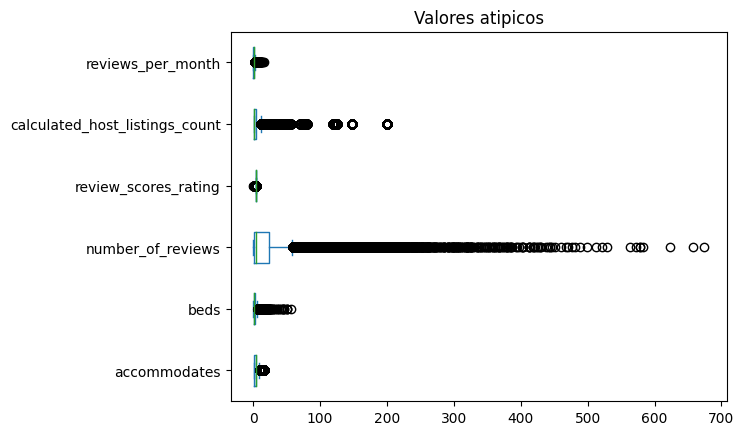

In [75]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [76]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido accommodates                       11.026495
beds                                8.519103
number_of_reviews                 154.562573
review_scores_rating                5.746627
calculated_host_listings_count     81.197680
reviews_per_month                   4.208422
dtype: float64
Limite inferior permitido accommodates                       -2.996839
beds                               -4.085569
number_of_reviews                -109.955257
review_scores_rating                3.856343
calculated_host_listings_count    -63.055861
reviews_per_month                  -2.028960
dtype: float64


In [77]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [78]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
accommodates,644
beds,400
number_of_reviews,811
review_scores_rating,495
calculated_host_listings_count,716
reviews_per_month,650


In [79]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [80]:
#Se juntan las columnas cualitativas con las cuantitativas
Rio_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Rio_outliers.head()

,accommodates,beds,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,...,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,amenities,price,has_availability,instant_bookable
0,5.0,2.0,17.3,4.71,1.0,1.88,https://www.airbnb.com/rooms/17878,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",...,t,Copacabana,Entire condo,Entire home/apt,1 bath,2.0,"[""Smoking allowed"", ""Essentials"", ""Air conditi...",$310.00,t,f
1,3.0,2.0,17.3,4.73,1.0,1.70,https://www.airbnb.com/rooms/25026,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,...,t,Copacabana,Entire rental unit,Entire home/apt,1 bath,1.0,"[""Fast wifi \u2013 501 Mbps"", ""Essentials"", ""H...",$203.00,t,f
2,2.0,1.0,5.0,5.00,3.0,0.03,https://www.airbnb.com/rooms/220377,2024-06-27,city scrape,Suíte Casal (banheiro privativo),...,t,Tijuca,Private room in rental unit,Private room,1 private bath,1.0,"[""Essentials"", ""Air conditioning"", ""Hangers"", ...",$220.00,t,f
3,2.0,1.0,17.3,4.91,1.0,2.85,https://www.airbnb.com/rooms/35764,2024-06-28,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,...,t,Copacabana,Entire loft,Entire home/apt,1.5 baths,1.0,"[""Essentials"", ""Hangers"", ""Window AC unit"", ""B...",$201.00,t,f
4,2.0,1.0,17.3,4.81,7.0,3.04,https://www.airbnb.com/rooms/223073,2024-06-28,city scrape,Modern Loft 1 • Ipanema Posto 9 • 500 mb,...,t,Ipanema,Entire loft,Entire home/apt,1 bath,1.0,"[""Fast wifi \u2013 543 Mbps"", ""Essentials"", ""F...",$321.00,t,t


In [81]:
#Comprobamos que no existan valores nulos
valores_nulos_Rio_outliers = Rio_outliers.isnull().sum()
valores_nulos_Rio_outliers

,0
accommodates,0
beds,0
number_of_reviews,0
review_scores_rating,0
calculated_host_listings_count,0
reviews_per_month,0
listing_url,0
last_scraped,0
source,0
name,0


Realizar la extracción de características de las siguientes columnas categóricas: (host_response_time, host_acceptance_rate, property_type, room_type, amenities y host_is_superhost).

In [82]:
#Extraer características de análisis univariado y generar tabla de frecuencias
freq_tbl(Rio_outliers)
Rio_outliers.dtypes

Se truncaron las últimas líneas 5000 del resultado de transmisión.
28917    0.000029         0.914522  
28918    0.000029         0.914551  
28919    0.000029         0.914580  
28920    0.000029         0.914609  
28921    0.000029         0.914638  
28922    0.000029         0.914667  
28923    0.000029         0.914695  
28924    0.000029         0.914724  
28925    0.000029         0.914753  
28926    0.000029         0.914782  
28927    0.000029         0.914811  
28928    0.000029         0.914840  
28929    0.000029         0.914868  
28930    0.000029         0.914897  
28931    0.000029         0.914926  
28932    0.000029         0.914955  
28933    0.000029         0.914984  
28934    0.000029         0.915013  
28935    0.000029         0.915042  
28936    0.000029         0.915070  
28937    0.000029         0.915099  
28938    0.000029         0.915128  
28939    0.000029         0.915157  
28940    0.000029         0.915186  
28941    0.000029         0.915215  
28942   

,0
accommodates,float64
beds,float64
number_of_reviews,float64
review_scores_rating,float64
calculated_host_listings_count,float64
reviews_per_month,float64
listing_url,object
last_scraped,object
source,object
name,object


Text(0.5, 1.0, 'Tiempo de respuesta del host')

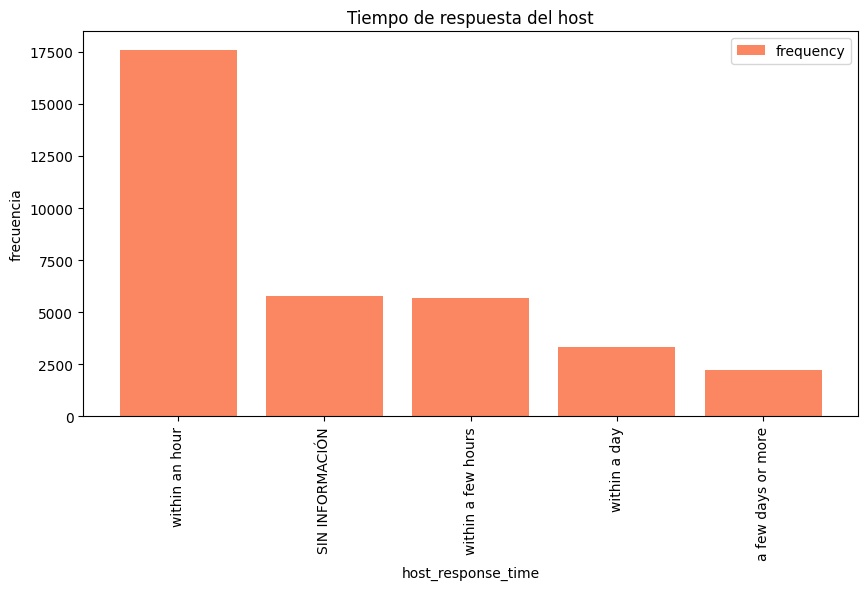

In [83]:
tabla1=freq_tbl(Rio_outliers["host_response_time"])
filtro1=tabla1[tabla1["frequency"]>1]
filtro1_index=filtro1.set_index("host_response_time")
filtro1_index_freq=filtro1_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro1_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#fa8762")
plt.ylabel("frecuencia")
plt.title("Tiempo de respuesta del host")

Text(0.5, 1.0, 'índice de aceptación de anfitriones')

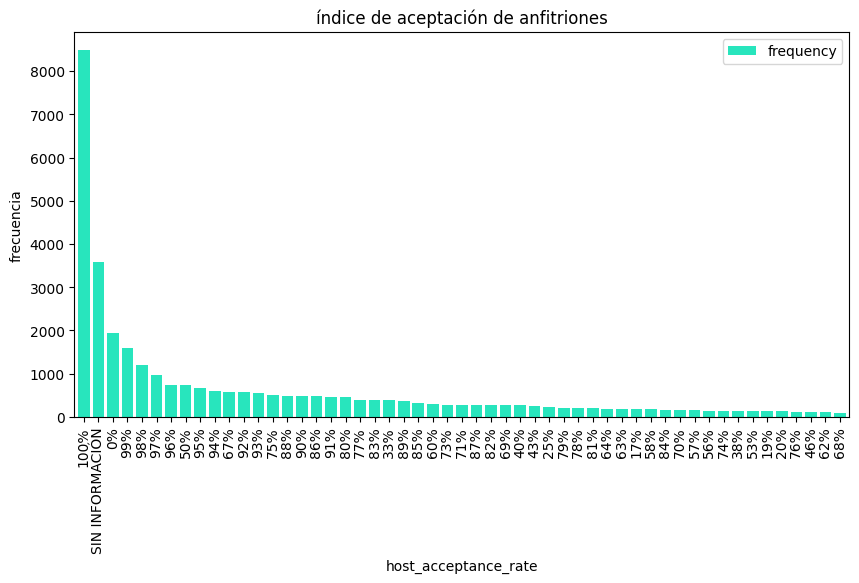

In [24]:
tabla2=freq_tbl(Rio_outliers["host_acceptance_rate"])
filtro2=tabla2[tabla2["frequency"]>100]
filtro2_index=filtro2.set_index("host_acceptance_rate")
filtro2_index_freq=filtro2_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro2_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#28e5bd")
plt.ylabel("frecuencia")
plt.title("índice de aceptación de anfitriones")

Text(0.5, 1.0, 'Tipo de propiedad')

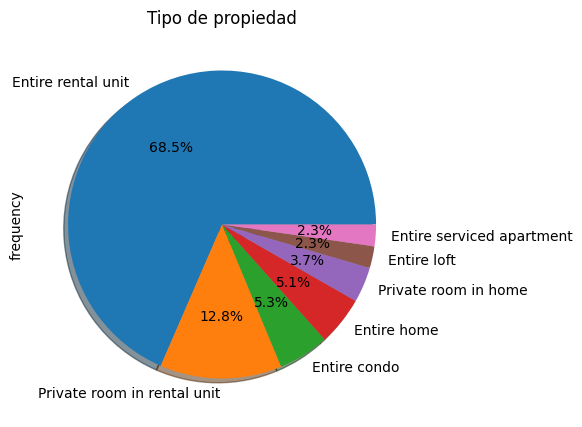

In [25]:
tabla3=freq_tbl(Rio_outliers["property_type"])
filtro3=tabla3[tabla3["frequency"]>400]
filtro3_index=filtro3.set_index("property_type")
filtro3_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de propiedad")

In [ ]:
tabla4=freq_tbl(Rio_outliers["room_type"])
filtro4=tabla4[tabla4["frequency"]>300]
filtro4_index=filtro4.set_index("room_type")
filtro4_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de cuarto")

Text(0.5, 1.0, 'Amenidades')

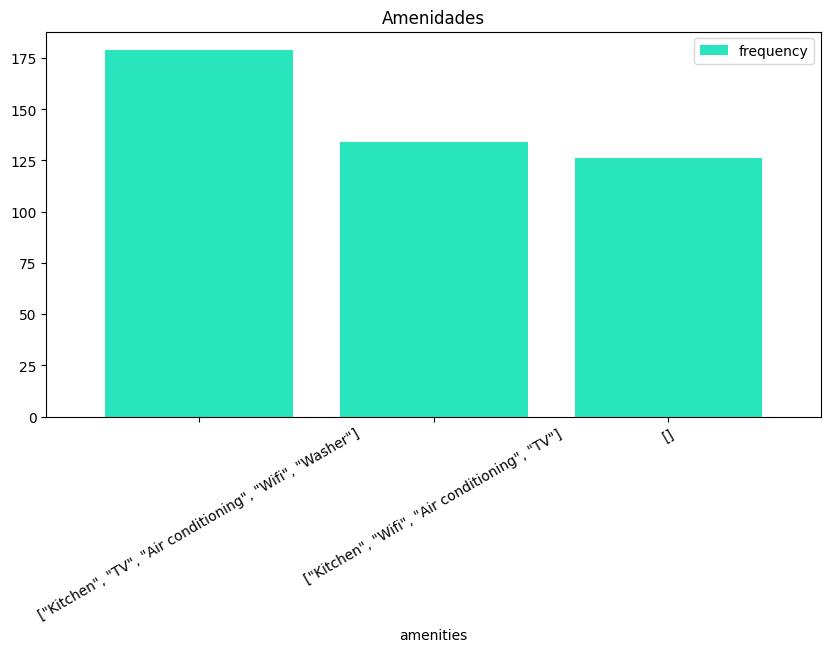

In [27]:
tabla5=freq_tbl(Rio_outliers["amenities"])
filtro5 = tabla5[(tabla5["frequency"] > 70) & (tabla5["frequency"] < 5000)]
filtro5_index=filtro5.set_index("amenities")
filtro5_index_freq=filtro5_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro5_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#28e5bd")
plt.xticks(rotation=30)
plt.title("Amenidades")

Text(0.5, 1.0, 'El host es superhost')

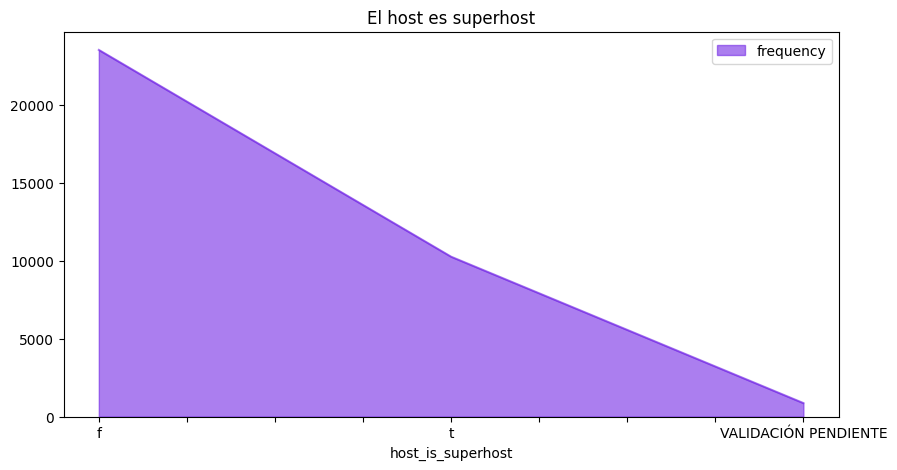

In [28]:
tabla6=freq_tbl(Rio_outliers["host_is_superhost"])
filtro6=tabla6[tabla6["frequency"]>1]
filtro6_index=filtro6.set_index("host_is_superhost")
filtro6_index_freq=filtro6_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro6_index_freq.plot(kind="area", figsize=(10,5), alpha=.6, color="#7328e5")
plt.title("El host es superhost")

Correlación

In [84]:
#Encontramos todas las correlaciones entre las variables y convertimos a valor absoluto
Corr_Factors=columnas_cuantitativas_limpio.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,accommodates,beds,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
accommodates,1.000000,0.579773,0.003628,0.019271,0.081863,0.013267
beds,0.579773,1.000000,0.081313,0.021929,0.053884,0.030757
number_of_reviews,0.003628,0.081313,1.000000,0.003576,0.017293,0.385149
review_scores_rating,0.019271,0.021929,0.003576,1.000000,0.111692,0.042687
calculated_host_listings_count,0.081863,0.053884,0.017293,0.111692,1.000000,0.079445
reviews_per_month,0.013267,0.030757,0.385149,0.042687,0.079445,1.000000


<Axes: >

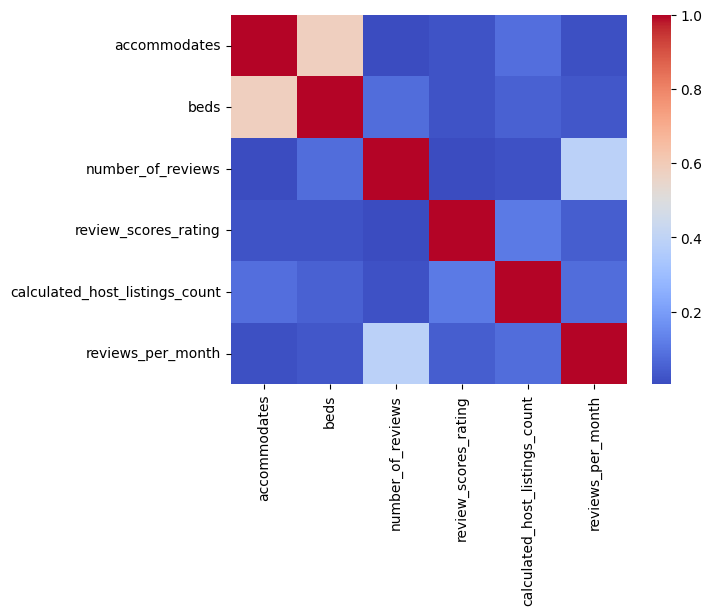

In [85]:
#Mapa de calor
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

Modelo 1

In [86]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['beds']]
Var_Dep= columnas_cuantitativas_limpio['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [87]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.7038136]),
 'rank_': 1,
 'singular_': array([285.67275005]),
 'intercept_': 2.354462958014637}

0.5797725603243534

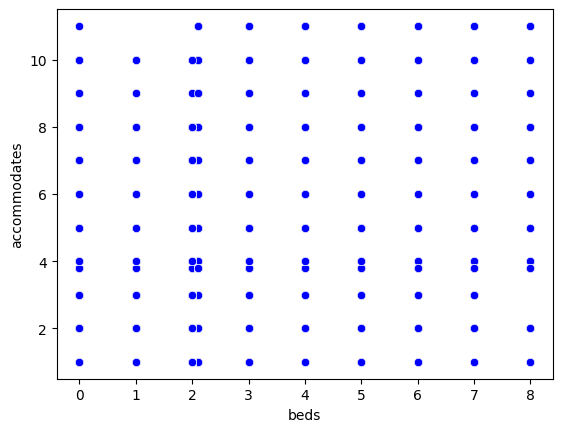

In [89]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='beds', y='accommodates', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

Modelo 2

In [90]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= columnas_cuantitativas_limpio[['reviews_per_month']]
Var_Dep2= columnas_cuantitativas_limpio['number_of_reviews']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [91]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([13.12927181]),
 'rank_': 1,
 'singular_': array([150.95786675]),
 'intercept_': 4.158816686909672}

0.38514865922514185

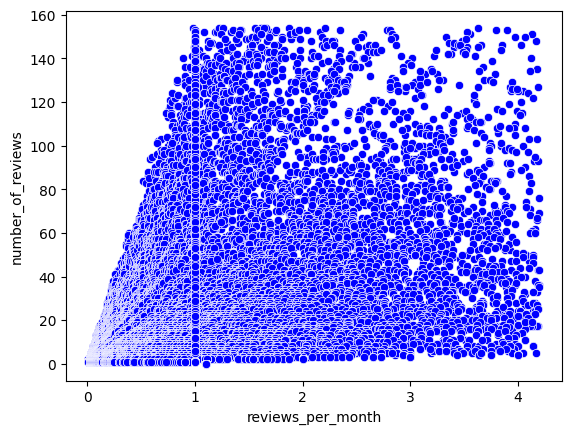

In [92]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

Modelo 3

In [93]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= columnas_cuantitativas_limpio[['review_scores_rating']]
Var_Dep3= columnas_cuantitativas_limpio['calculated_host_listings_count']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [94]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.82395241]),
 'rank_': 1,
 'singular_': array([35.9930422]),
 'intercept_': 39.05690597598872}

0.11169234312207986

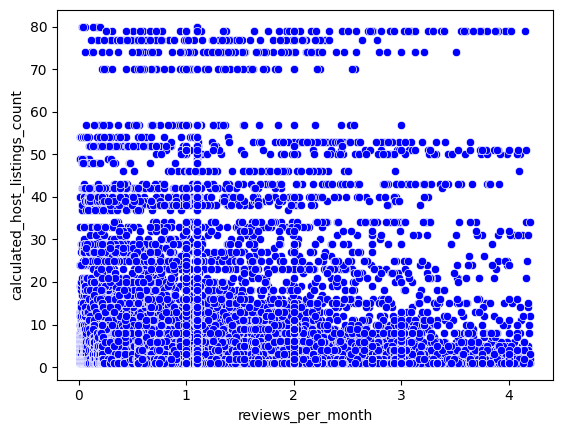

In [95]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='reviews_per_month', y='calculated_host_listings_count', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

Regresión multiple

In [96]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["beds","number_of_reviews",	"review_scores_rating","calculated_host_listings_count",	"reviews_per_month"]]
Var_DepM= columnas_cuantitativas_limpio['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()

In [97]:
#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'number_of_reviews', 'review_scores_rating',
        'calculated_host_listings_count', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.70903154, -0.0043766 , -0.03114181,  0.00740724,  0.12095266]),
 'rank_': 5,
 'singular_': array([5146.5327161 , 2198.70914991,  284.55404797,  138.40866695,
          35.70835165]),
 'intercept_': 2.403116493526353}

In [98]:
coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM


0.5856607584426667

<Axes: xlabel='beds', ylabel='accommodates'>

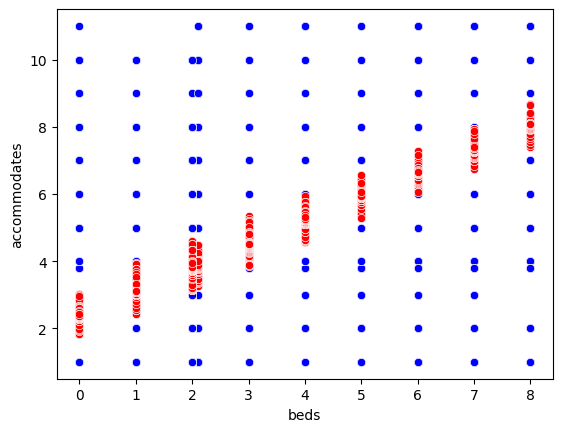

In [102]:
#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["beds","number_of_reviews",	"review_scores_rating","calculated_host_listings_count",	"reviews_per_month"]])
#columnas_cuantitativas_limpio.insert(0, 'Predicciones', y_pred)

sns.scatterplot(x='beds', y='accommodates', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='beds', y='Predicciones', color="red", data=columnas_cuantitativas_limpio)